In [1058]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [1059]:
obesity=pd.read_csv('ObesityDataSet.csv')

In [1060]:
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [1061]:
obesity['Gender'].value_counts()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

In [1062]:
numberic=obesity.select_dtypes(include='number').columns

In [1063]:
orginal=obesity.copy()

In [1064]:
len(numberic)

8

In [1065]:
obesity.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [1066]:
obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [1067]:
obesity.drop('NObeyesdad',axis=1,inplace=True)

In [1068]:
X=obesity.copy()

In [1069]:
X.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [1070]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

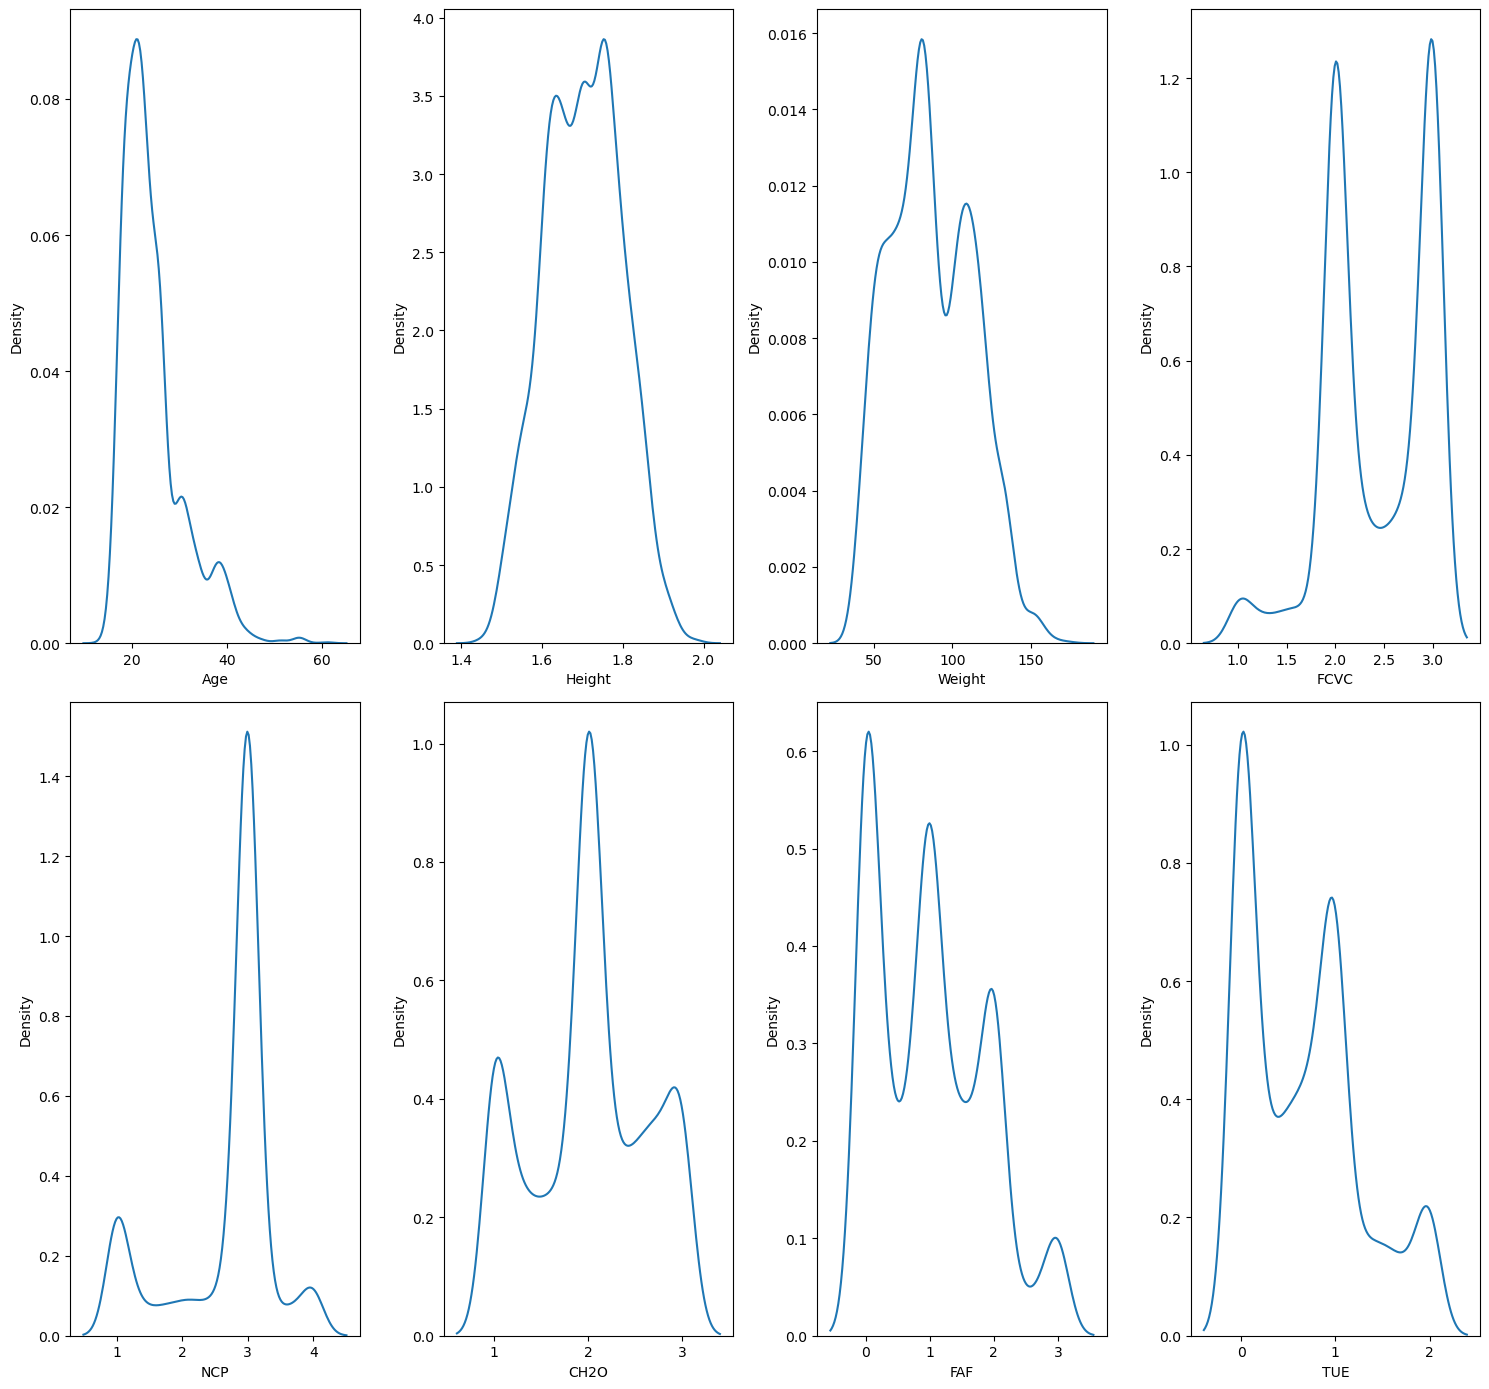

In [1071]:
plt.figure(figsize=(15,14))
plot=1
for i in numberic:
    plt.subplot(2,4,plot)
    plot+=1
    sns.kdeplot(data=X,x=i)
plt.tight_layout()
plt.show()

In [1072]:
skewness=X[numberic].skew()

In [1073]:
X[numberic].skew()

Age       1.529100
Height   -0.012855
Weight    0.255410
FCVC     -0.432906
NCP      -1.107097
CH2O     -0.104912
FAF       0.498490
TUE       0.618502
dtype: float64

In [1074]:
from sklearn.preprocessing import  StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X[numberic])

In [1075]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    capped_series = series.clip(lower=lower_bound, upper=upper_bound)
    return capped_series

In [1076]:
for col in numberic:
    X[col] = cap_outliers(X[col])

In [1077]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.000000,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.000000,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.000000,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.000000,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,2.146845,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [1078]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
            'SMOKE', 'SCC', 'CALC', 'MTRANS']
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

c:\Users\Ashvitta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Ashvitta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Ashvitta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Ashvitta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory le

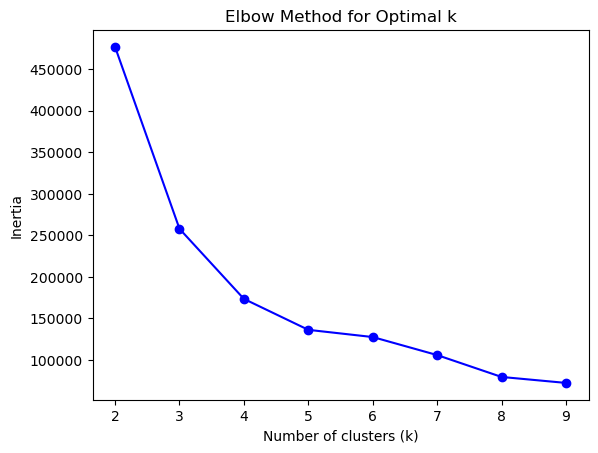

In [1079]:
from sklearn.cluster import KMeans
inertia = []
K = range(2, 10) 
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [1080]:
Cluster=X.copy()

In [1081]:
kmeans = KMeans(n_clusters=3)
Cluster['K-Cluster'] = kmeans.fit_predict(X)

c:\Users\Ashvitta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [1082]:
cluster_summary = Cluster.groupby('K-Cluster').mean()
print(cluster_summary)

             Gender        Age    Height      Weight  \
K-Cluster                                              
0          0.556164  25.268412  1.741478  116.605339   
1          0.609475  25.002468  1.703850   82.346744   
2          0.310000  20.836213  1.650419   55.576385   

           family_history_with_overweight      FAVC      FCVC       NCP  \
K-Cluster                                                                 
0                                0.997260  0.986301  2.637613  2.881162   
1                                0.875800  0.874520  2.252736  2.740186   
2                                0.523333  0.771667  2.369593  2.904099   

               CAEC     SMOKE      CH2O       SCC       FAF       TUE  \
K-Cluster                                                               
0          1.986301  0.023288  2.098798  0.002740  0.860003  0.596373   
1          1.919334  0.017926  2.035250  0.024328  1.072906  0.620848   
2          1.626667  0.021667  1.862098  0.125000  

In [1083]:
from sklearn.metrics import silhouette_score
final_score = silhouette_score(X, Cluster['K-Cluster'])
print(f"Final Silhouette Score: {final_score:.4f}")

Final Silhouette Score: 0.5165


In [1084]:
Cluster['K-Cluster'].value_counts()

K-Cluster
1    781
0    730
2    600
Name: count, dtype: int64

In [1085]:
Cluster.groupby('K-Cluster')['Weight'].mean()

K-Cluster
0    116.605339
1     82.346744
2     55.576385
Name: Weight, dtype: float64

In [1086]:
cluster_labels = {
    0: "Obesity_Type_II",
    1: "Normal_Weight",
    2: "Overweight"
}
# Map labels
obesity['Obeyes'] = Cluster['K-Cluster'].map(cluster_labels)


Model Fitting

In [1087]:
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obeyes
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Overweight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Overweight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Normal_Weight
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [1088]:
obesity.shape

(2111, 17)

In [1089]:
X=obesity.drop('Obeyes',axis=1)
y=Cluster['K-Cluster']

In [1090]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')  # Handles negative values
X[numberic]=pt.fit_transform(X[numberic])

In [1091]:
import pickle
with open('power_transformer.pkl', 'wb') as f:
    pickle.dump(pt, f)

In [1092]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X[numberic])

In [1093]:
X[numberic]=X_scaled

In [1094]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [1095]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
            'SMOKE', 'SCC', 'CALC', 'MTRANS']
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le  

In [1096]:
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [1097]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [1098]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [1099]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
)
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier()
}
#Train and evaluate
results = {}
best_model = None
best_name = None
best_acc = 0.0
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        results[name] = acc
        print(f"{name}: {acc:.4f}")
        if acc > best_acc:
            best_acc = acc
            best_name = name
            best_model = model
    except Exception as e:
        print(f"{name}: Error - {e}")


Logistic Regression: 0.9905
Naive Bayes: 0.8582
Random Forest: 0.9976
Gradient Boosting: 0.9953
AdaBoost: 0.9953
XGBoost: 0.9953


In [1100]:
if best_model is not None:
    with open('best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    print(f"\nBest model '{best_name}' saved successfully with accuracy = {best_acc:.4f}")
else:
    print("\nNo valid model was trained")


Best model 'Random Forest' saved successfully with accuracy = 0.9976
